In [2]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Sobel Y')

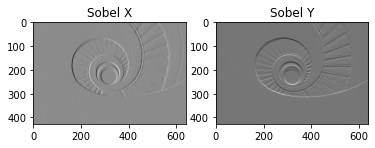

In [16]:
img = cv.imread("spiral.jpg")
bwimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
dst = cv.GaussianBlur(bwimg, (3,3), cv.BORDER_DEFAULT)

sobelx = cv.Sobel(dst, cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(dst, cv.CV_64F,0,1,ksize=3)

plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')

In [4]:
G = np.zeros(img.shape, np.uint8)

Text(0.5, 1.0, 'Gradient Image')

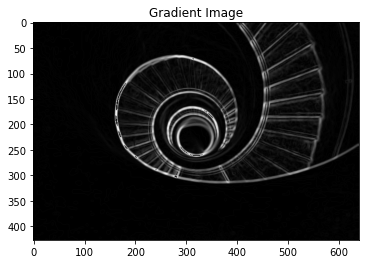

In [5]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        G[i][j] = math.sqrt((sobelx[i][j])**2 + (sobely[i][j])**2)
G = cv.cvtColor(G, cv.COLOR_BGR2GRAY)
plt.imshow(G, cmap = 'gray')
plt.title("Gradient Image")


In [6]:
def set_T(T):
    T = cv.getTrackbarPos("T", "Staircase")

In [7]:
temp = G.copy()
T = 0
cv.imshow("Staircase", temp)
cv.createTrackbar("T", "Staircase", 1, 100, set_T)
while True:
    cv.imshow("Staircase", temp)
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
    if key==13: #if key pressed is Enter
        T = cv.getTrackbarPos("T","Staircase")
        temp = G.copy()
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(temp[i][j] > T):
                    temp[i][j] = 255
                else:
                    temp[i][j] = 0
cv.destroyAllWindows()

In [8]:
def set_T1(*args):
    T = cv.getTrackbarPos("T", "Controls")

In [9]:
def set_T2(*args):
    T = cv.getTrackbarPos("T", "Controls")

In [15]:
img = cv.imread("spiral.jpg")
test = img.copy()
T1 = 0
T2 = 0
cv.imshow("Staircase", test)
cv.createTrackbar("T1", "Staircase", 1, 100, set_T1)
cv.createTrackbar("T2", "Staircase", 1, 100, set_T2)
while True:
    cv.imshow("Staircase", test)
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
    if key==13: #if key pressed is Enter
        T1 = cv.getTrackbarPos("T1", "Staircase")
        T2 = cv.getTrackbarPos("T2", "Staircase")
        test = cv.Canny(img, T1, T2)
cv.destroyAllWindows()

Text(0.5, 1.0, 'Test Image')

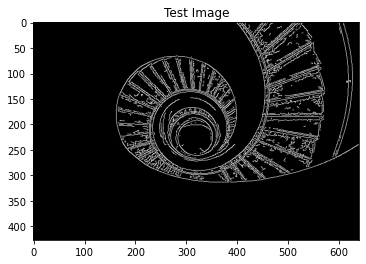

In [14]:
plt.imshow(test, cmap = 'gray')
plt.title("Test Image")

In [19]:
totalp = img.shape[0] * img.shape[1]
sameCtr = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if (temp[i][j] == test[i][j]):
            sameCtr += 1
similarity = sameCtr/totalp
print(similarity)

0.8777078454332553
